In [104]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Configure libraries
sns.set()

# Round decimals when displaying DataFrames
pd.set_option('precision', 4)

In [106]:
# load dataset
billboardWeekly = pd.read_csv('billboardHotWeekly.csv')
gender_data = pd.read_csv('singers_gender.csv', encoding = "ISO-8859-1")
gender_data.rename(columns ={'artist':'Performer'}, inplace=True)

In [107]:
#Clean up gender data
gender_data.dropna()
#Remove rows that have weird symbol such as "?"
gender_data = gender_data[~gender_data['Performer'].str.contains('\?')]
gender_data = gender_data[~gender_data['Performer'].str.contains('\*')]

#Remove irrelevant data such as guitarists
gender_data = gender_data[~gender_data['category'].str.contains('guitarists')]
gender_data = gender_data[~gender_data['category'].str.contains('songwriters')]
gender_data

,Performer,gender,category
0,12 Gauge,male,African-American_male_rappers
1,1987,male,Swedish_male_singers
2,2 Chainz,male,African-American_male_rappers
3,2 Pistols,male,African-American_male_rappers
4,21 Savage,male,African-American_male_rappers
...,...,...,...
23163,Éva Gauthier,female,Canadian_female_singers
23167,Órla Fallon,female,Irish_female_singers
23171,Östen Warnerbring,male,Swedish_male_singers
23174,Úna MacLochlainn,female,Irish_female_singers


In [134]:
#Function to help clean up the category column
def standardize_race(race):
    # Make input all lowercase and drop all whitespace
    race = race.lower()
    race = race.strip()

    #Remove "singers", "male" , "female", "_"
    race = race.replace('female', '')
    race = race.replace('male', '')
    race = race.replace('singers', '')
    race = race.replace('_', '')
    race = race.replace('rappers', '')
    #Remove genre
    race = race.replace('pop', '')
    race = race.replace('rock', '')
    race = race.replace('jazz', '')
    race = race.replace('composers', '')
    race = race.replace('crooners', '')
    race = race.replace('country', '')
    race = race.replace('english', 'british')
    race = race.replace('scottish', 'british')
    race = race.replace('welsh', 'british')
    race = race.strip()
    race = race.replace('-', ' ')
    
    if len(race) > 1:
        output = race
    else:
        output = np.nan
        
    return output
    

In [135]:
#Apply the transformation and drop rows with missing information
gender_data['nationality'] = gender_data['category'].apply(standardize_race)
gender_data.dropna(subset=['nationality'], inplace=True)

In [136]:
# New df that will contain the two dfs
merged_df = pd.merge(billboardWeekly, gender_data, on='Performer')
merged_df

,url,WeekID,Week Position,Song,Performer,SongID,Instance,PreviousWeekPosition,PeakPosition,WeeksOnChart,Unnamed: 10,Unnamed: 11,gender,category,nationality
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,NaN,NaN,female,Canadian_female_pop_singers,canadian
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75,53,2.0,NaN,NaN,female,Canadian_female_pop_singers,canadian
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53,43,3.0,NaN,NaN,female,Canadian_female_pop_singers,canadian
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43,37,4.0,NaN,NaN,female,Canadian_female_pop_singers,canadian
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37,27,5.0,NaN,NaN,female,Canadian_female_pop_singers,canadian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102483,http://www.billboard.com/charts/hot-100/1996-0...,6/15/1996,52,Your Loving Arms,Billie Ray Martin,Your Loving ArmsBillie Ray Martin,2,54,52,19.0,NaN,NaN,female,British_female_singers,british
102484,http://www.billboard.com/charts/hot-100/1996-0...,6/22/1996,51,Your Loving Arms,Billie Ray Martin,Your Loving ArmsBillie Ray Martin,2,52,51,20.0,NaN,NaN,female,British_female_singers,british
102485,http://www.billboard.com/charts/hot-100/1996-0...,6/29/1996,48,Your Loving Arms,Billie Ray Martin,Your Loving ArmsBillie Ray Martin,2,51,48,21.0,NaN,NaN,female,British_female_singers,british
102486,http://www.billboard.com/charts/hot-100/1996-0...,7/6/1996,46,Your Loving Arms,Billie Ray Martin,Your Loving ArmsBillie Ray Martin,2,48,46,22.0,NaN,NaN,female,British_female_singers,british


In [137]:
#Clean up the merged df
#Get rid of the unnamed columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]

In [138]:
#Collect year
def standardize_year(year):
    
    if "195" in year:
        out = 1950
    elif "196" in year:
        out = 1960
    elif "197" in year:
        out = 1970
    elif "198" in year:
        out = 1980
    elif "199" in year:
        out = 1990
    elif "200" in year:
        out = 2000
    elif "201" in year:
        out = 2010
    else:
        out = np.nan
    
    return out

In [139]:
#Set a new year column and standardize the year to just decades
merged_df[['Month', 'Day', 'Year']] = merged_df.WeekID.str.split('/', expand=True)
#Drop the month and day
merged_df = merged_df.drop(['Month', 'Day'], axis=1)
merged_df['Decade'] = merged_df['Year'].apply(standardize_year)
merged_df.loc[merged_df.Performer == 'Sting', 'nationality'] = 'british'
merged_df.loc[merged_df.Performer == 'Jimmy Somerville', 'nationality'] = 'scottish'
merged_df.loc[merged_df.Performer == 'Rihanna', 'nationality'] = 'american'
merged_df.loc[merged_df.Performer == 'Eve', 'nationality'] = 'american'

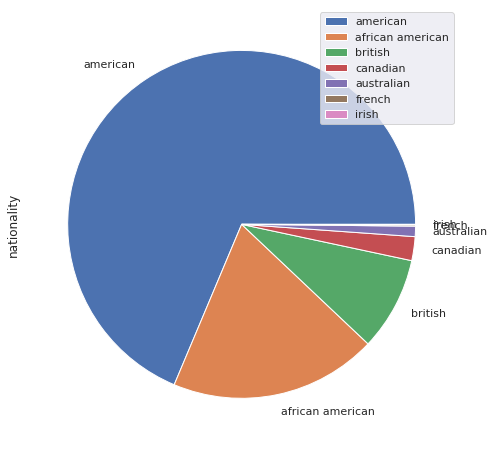

In [140]:
fifty_seventy_dec = merged_df[(merged_df.Decade == 1950)|(merged_df.Decade == 1960)|(merged_df.Decade == 1970)]
fsd_vals = fifty_seventy_dec['nationality'].value_counts().to_frame()
fsd_cat = fifty_seventy_dec['nationality'].value_counts().index.tolist()
fsd_vals.plot.pie(y='nationality', figsize=(8,8))

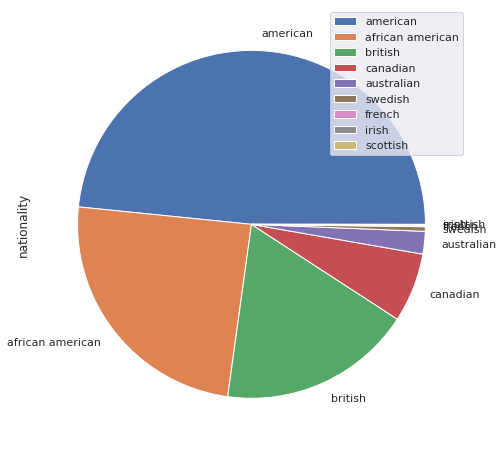

In [141]:
eighty_ninety_dec = merged_df[(merged_df.Decade == 1980)|(merged_df.Decade == 1990)]
end_vals = eighty_ninety_dec['nationality'].value_counts().to_frame()
end_cat = eighty_ninety_dec['nationality'].value_counts().index.tolist()
end_vals.plot.pie(y='nationality', figsize=(8,8))

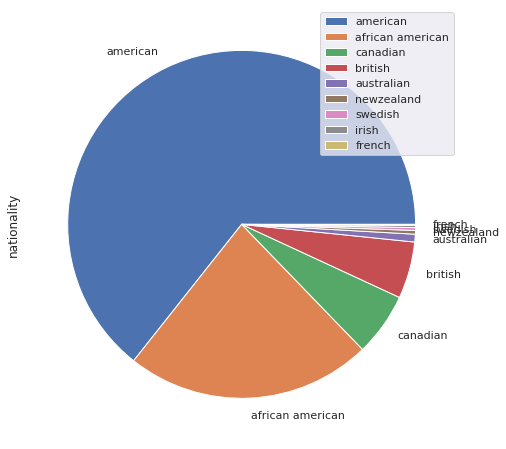

In [142]:
two_thousands_dec = merged_df[(merged_df.Decade == 2000)|(merged_df.Decade == 2010)]
ttd_vals = two_thousands_dec['nationality'].value_counts().to_frame()
ttd_cat = two_thousands_dec['nationality'].value_counts().index.tolist()
ttd_vals.plot.pie(y='nationality', figsize=(8,8))

In [143]:
# We will remove duplicates and count frequencies
new_df = billboardWeekly.groupby(['Performer']).size().reset_index()
new_df.rename(columns = {0: 'Frequency'}, inplace = True)

# sort the column in descending order
new_df = new_df.sort_values(by=['Frequency'], ascending = False)
new_df

,Performer,Frequency
2506,Elton John,889
7657,Taylor Swift,869
5203,Madonna,857
8833,Tim McGraw,719
4441,Kenny Chesney,709
...,...,...
3828,Jermaine Paul,1
6674,RiceGum Featuring Alissa Violet,1
3800,Jennifer Lopez Featuring DJ Khaled & Cardi B,1
3798,Jennifer Lopez & Lin-Manuel Miranda,1


In [144]:
# Test dropping all non-numeric rows
new_df = new_df[new_df['Frequency'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

In [145]:
# Merge the two df's together
new_df_nat = pd.merge(new_df, gender_data, on='Performer')
new_df_nat = new_df_nat.drop('gender', axis=1)
new_df_nat
# manually set race for people
new_df_nat.loc[new_df_nat['Performer']=='Rihanna', 'nationality'] = 'american'

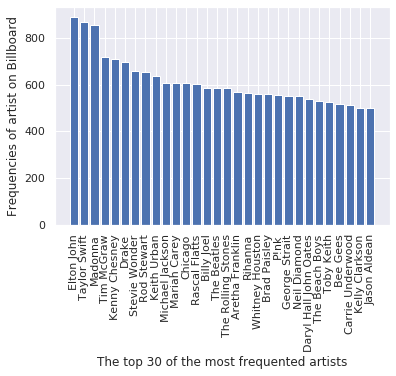

In [146]:
#Get the top 30 of the top freqs
top_freqs = new_df.head(30)
#Frequency represents the number of times that artist had a song 
#in the Billboard top 100.
t_f_height = top_freqs['Frequency'].tolist()
t_f_bars = top_freqs['Performer'].tolist()
t_f_y_pos = np.arange(len(t_f_bars))
plt.bar(t_f_y_pos, t_f_height)
plt.xticks(t_f_y_pos, t_f_bars, rotation='vertical')
plt.xlabel("The top 30 of the most frequented artists")
plt.ylabel("Frequencies of artist on Billboard")
plt.show()

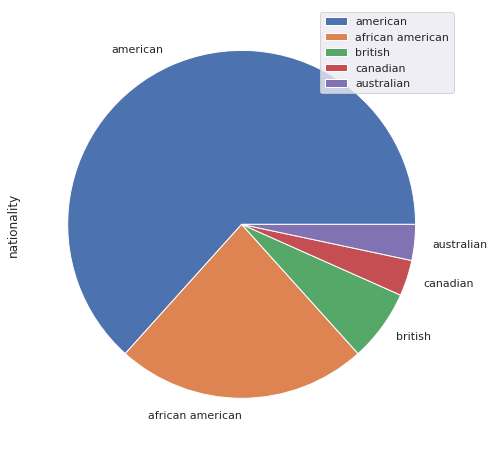

In [147]:
top_freq_nat = new_df_nat.head(30)
# unique_cat = top_freq_nat['nationality'].value_counts().index.tolist()
top_nat = top_freq_nat['nationality'].value_counts().to_frame()
top_nat_cat = top_freq_nat['nationality'].value_counts().index.tolist()

top_nat.plot.pie(y='nationality', figsize=(8,8))

In [148]:
# # Line plot
# df_barplot = new_df.plot(x='Performer', y='Frequency')
# df_barplot

In [149]:
# create a new dictionary and store the max number of weeks on chart for each song/instance
dictSortIndex = {}
for row in billboardWeekly.itertuples():
    if row.SongID in dictSortIndex.keys():
        if row.Instance in ((dictSortIndex[row.SongID]).keys()):
            if (dictSortIndex[row.SongID])[row.Instance] < row.WeeksOnChart:
                (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
        else:
            (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
    else:
        dictSortIndex[row.SongID] = {}
        (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
